In [1]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import  seaborn as sns

from forest import Scene

pygame 2.1.2 (SDL 2.0.18, Python 3.8.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 12, 6
%config InlineBackend.figure_format = "retina"
sns.set()

In [3]:
NB_RUNS = 2 # leave at 100 later

def remaining_trees_per_density():
    densities = np.arange(0.1, 1.0, 0.05)
    remaining_trees_count = []
    for density in tqdm(densities):
        mean = 0
        for run in range(NB_RUNS):
            scene = Scene(density=density, display=False)
            done = False
            while not done:
                changed = scene.update_forest()
                done = not changed
            mean += scene.nb_tree() / scene.grid.initial_nb_trees
        mean /= NB_RUNS
        remaining_trees_count.append(mean)
    return densities, remaining_trees_count

  0%|          | 0/18 [00:00<?, ?it/s]

------------------

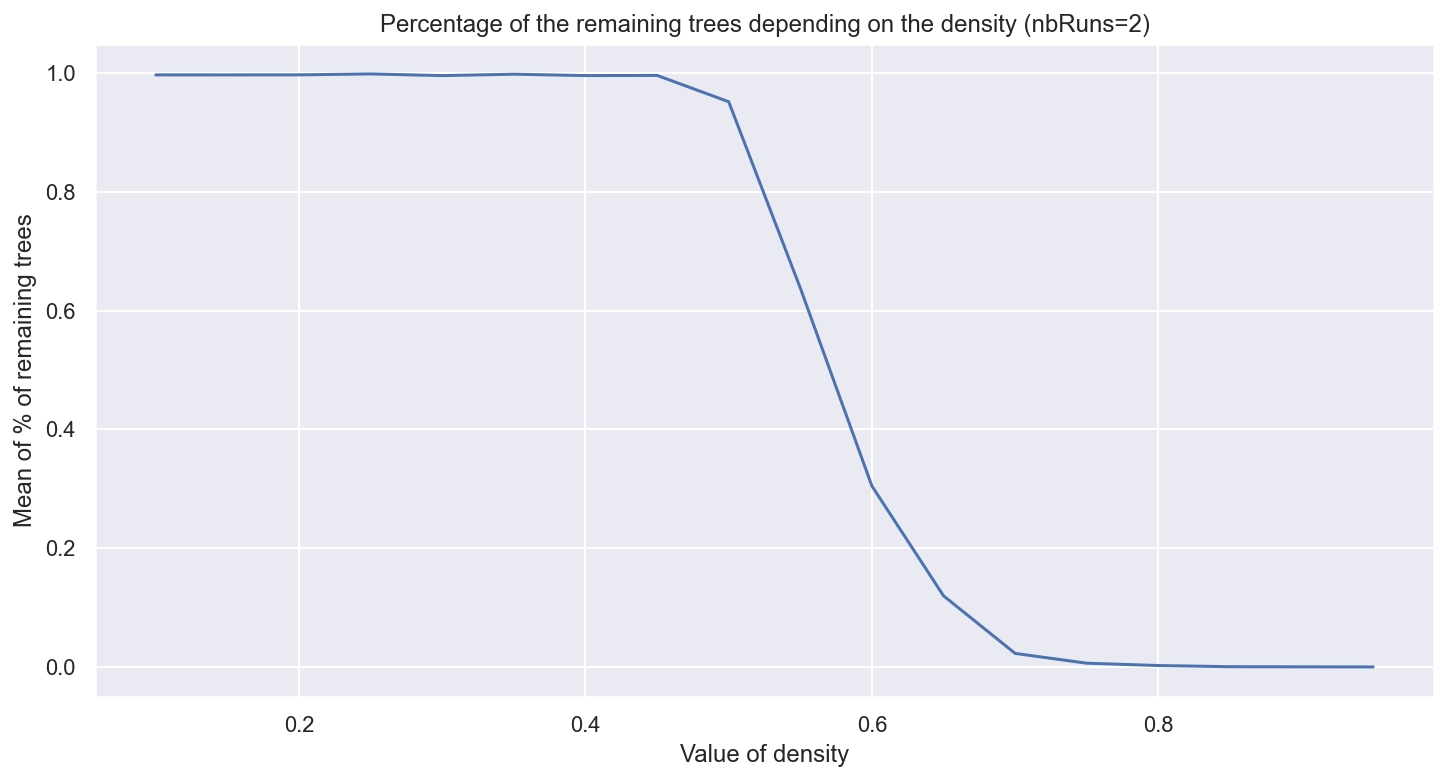

In [4]:
density_values, remaining_trees = remaining_trees_per_density()

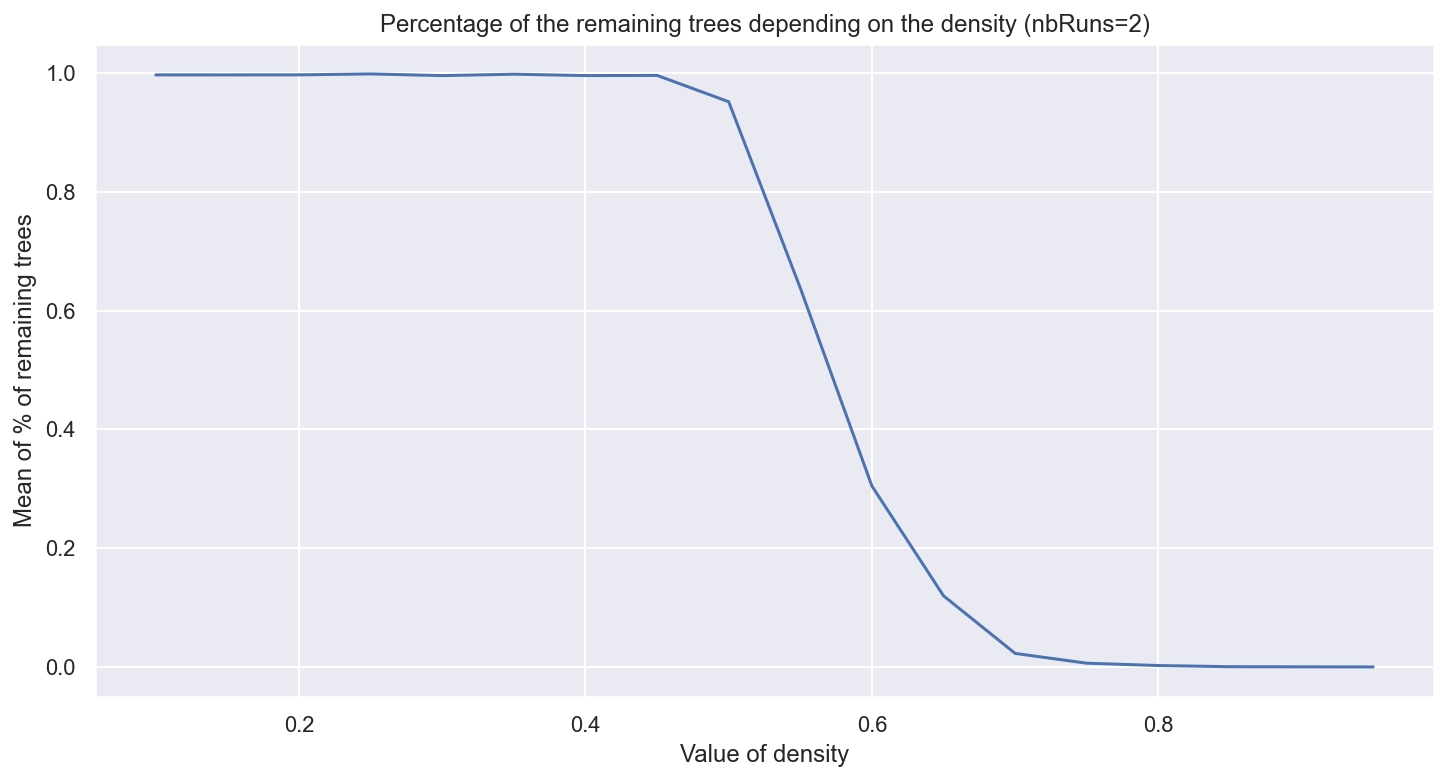

In [5]:
plt.plot(density_values, remaining_trees)
plt.xlabel("Value of density")
plt.ylabel("Mean of % of remaining trees")
plt.title(
    "Percentage of the remaining trees depending on the density (nbRuns=%d)" % NB_RUNS)
plt.show()